We consider the Riemannian metric
$$
K_\lambda(z) :=
\frac{\sqrt{\lambda^{2} + 4\|z\|^{2}} - \lambda}{2\|z\|^{2}}\;z\,z^\top
+
\frac{\lambda + \sqrt{\lambda^{2} + 4\|z\|^{2}}}{2}\;I
$$
and Riemannian gradient flor of $\ell(z) := \|z-y\|^2$
$$
\frac{dz}{dt} \;=\; -K(z)\,\bigl(z - y\bigr)
$$

The eigenvalues of $K$ are 
\begin{aligned}
\lambda_{1}& =\sqrt{\lambda^{2}+4r^{2}}\quad&(\text{along }z), \\
\lambda_{2}& =\frac{\lambda+\sqrt{\lambda^{2}+4r^{2}}}{2}
\quad&(\text{on }z^{\perp},\text{ multiplicity }d-1).
\end{aligned}

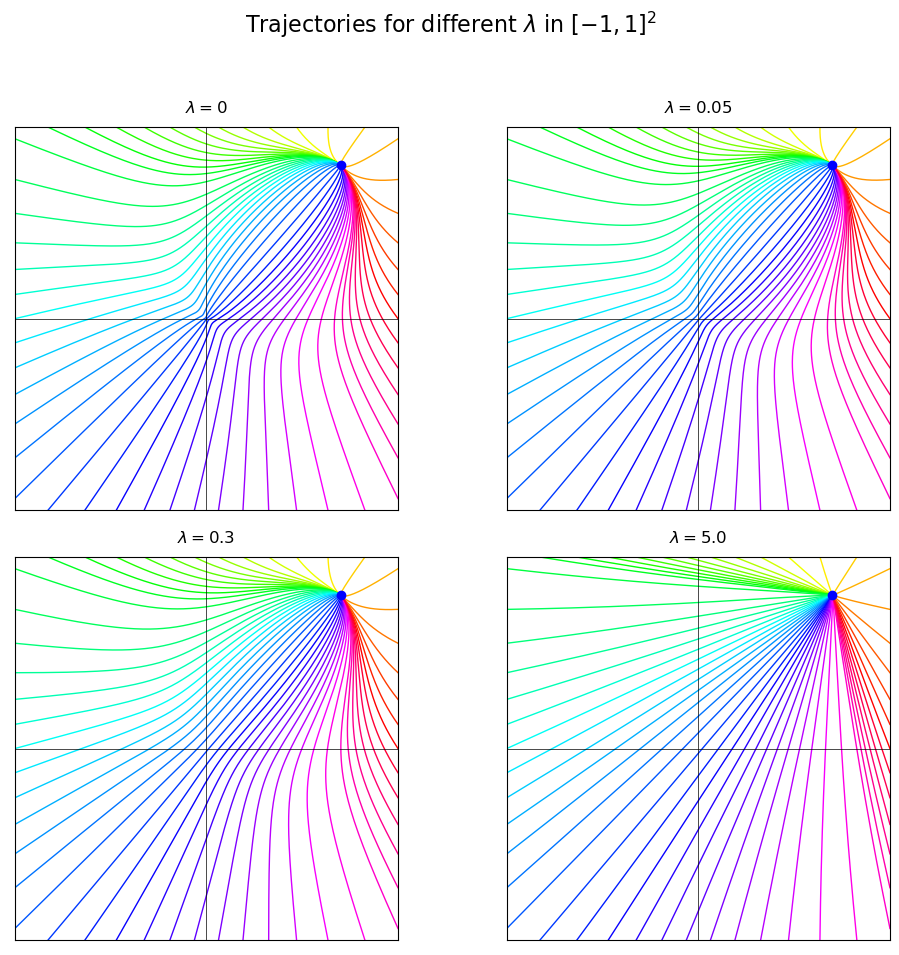

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def K(z, lam):
    norm_z = np.linalg.norm(z)
    u2 = (lam + np.sqrt(lam**2 + 4 * norm_z**2)) / 2
    return np.outer(z, z) / u2 + u2 * np.eye(2)

# Parameters
y = np.array([0.7, 0.8])
lambdas = [0, 0.05, 0.3, 5.0]
tau = 0.01       # Step size
n_steps = 1000   # Integration steps
k = 50           # Number of initial points

# Generate initial points on boundary of [-1,1]^2
thetas = np.linspace(0, 2 * np.pi, k, endpoint=False)
inits = []
for theta in thetas:
    p = np.array([np.cos(theta), np.sin(theta)])
    p = p / np.max(np.abs(p))
    inits.append(p)
colors = plt.cm.hsv(thetas / (2 * np.pi))  # Periodic color palette

# Plot trajectories on 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for ax, lam in zip(axes, lambdas):
    for p0, color in zip(inits, colors):
        traj = np.zeros((n_steps + 1, 2))
        traj[0] = p0
        z = p0.copy()
        for i in range(n_steps):
            z = z - tau * K(z, lam).dot(z - y)
            traj[i + 1] = z
        ax.plot(traj[:, 0], traj[:, 1], color=color, linewidth=1)
    # Mark y position
    ax.plot(y[0], y[1], 'o', color='blue', markersize=6)
    # Draw axes cross at origin
    ax.axhline(0, color='k', linewidth=0.5)
    ax.axvline(0, color='k', linewidth=0.5)
    # Square box, no ticks
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(r'$\lambda={}$'.format(lam), pad=10)

# Overall title
plt.suptitle(r"Trajectories for different $\lambda$ in $[-1,1]^2$", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


/var/folders/c3/8qf_y_jj6393y3l0dl0bb3k80000gp/T/ipykernel_1735/2252004165.py:9: RuntimeWarning: invalid value encountered in divide
  return np.outer(z, z) / u2 + u2 * np.eye(2)


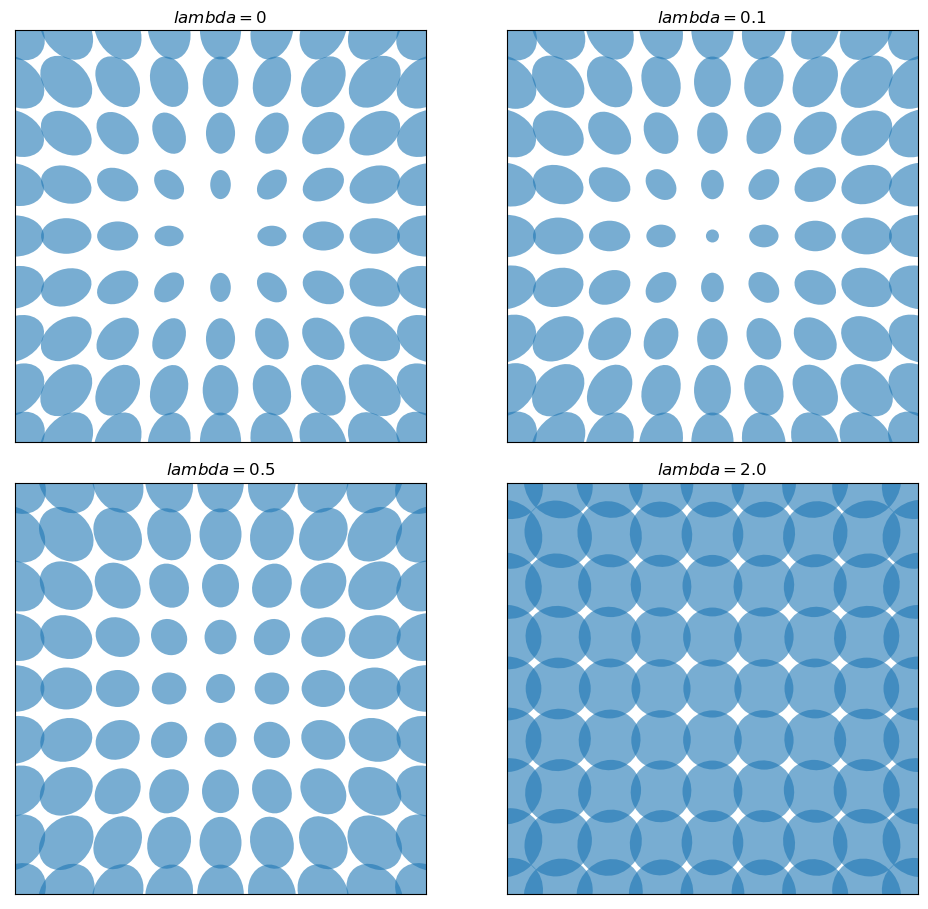

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Define K_lambda
def K(z, lam):
    norm_z = np.linalg.norm(z)
    u2 = (lam + np.sqrt(lam**2 + 4 * norm_z**2)) / 2
    return np.outer(z, z) / u2 + u2 * np.eye(2)

# Plotting function for ellipses
def plot_K_ellipses(ax, lam, k, scale):
    # create grid of points in [-1,1]^2
    xs = np.linspace(-1, 1, k)
    ys = np.linspace(-1, 1, k)
    for x in xs:
        for y in ys:
            z = np.array([x, y])
            Kz = K(z, lam)
            # eigen-decomposition
            vals, vecs = np.linalg.eigh(Kz)
            # widths: sqrt of eigenvalues scaled
            width, height = scale * np.sqrt(vals)
            # angle of first eigenvector in degrees
            angle = np.degrees(np.arctan2(vecs[1, 0], vecs[0, 0]))
            # draw ellipse at (x,y)
            ell = Ellipse(xy=(x, y), width=2*width, height=2*height, angle=angle, alpha=0.6)
            ax.add_patch(ell)
    # formatting
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(r'$lambda={}$'.format(lam))

# Scaling factor for ellipse size
s = .1
# Parameters and plotting
lambdas = [0, 0.1, 0.5, 2.0]
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()
for ax, lam in zip(axes, lambdas):
    plot_K_ellipses(ax, lam, k=9, scale=s)

#plt.suptitle(r"Ellipse visualization of $K_{\lambda}(z)$ in $[-1,1]^2$", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
